In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
# install dependencies: 
!pip install pyyaml==5.1
# check pytorch installation: 
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 5.9 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [34 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-s19cvolv/pyyaml_4d62a0b350d34a708557a8ac8b3008b6/setup.py", line 291, in <module>
          setup(
        File "/opt/conda/lib/python3.10/site-packages/setuptools/_distutils/core.py", line 185, in setup
          return run_commands(dist)
        File "/opt/conda/lib/python3.10/site-packages/setuptools/_distutils/core.py", line 201, in run_commands
          dist.run_commands()
        File "/opt/conda/lib/python3.10/site-packages/setuptools/_distutils/dist.py", line 969, in run_commands
          self.run_command(cmd)
        File "/opt/conda

In [2]:
# clone the repo in order to access pre-defined configs in PointRend project
!git clone --branch v0.6 https://github.com/facebookresearch/detectron2.git detectron2_repo
# install detectron2 from source
!pip install -e detectron2_repo
# See https://detectron2.readthedocs.io/tutorials/install.html for other installation options

Cloning into 'detectron2_repo'...
remote: Enumerating objects: 15676, done.
remote: Counting objects: 100% (399/399), done.
remote: Compressing objects: 100% (304/304), done.
remote: Total 15676 (delta 177), reused 274 (delta 95), pack-reused 15277
Receiving objects: 100% (15676/15676), 6.51 MiB | 20.01 MiB/s, done.
Resolving deltas: 100% (11292/11292), done.
Note: switching to 'd1e04565d3bec8719335b88be9e9b961bf3ec464'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

Obtaining file:///kaggle/working/detectron2_repo
  Prepari

In [6]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import torch

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.data import MetadataCatalog
coco_metadata = MetadataCatalog.get("coco_2017_val")

# import PointRend project
from detectron2.projects import point_rend

In [4]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-_c6tgw8o
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-_c6tgw8o
  Resolved https://github.com/facebookresearch/detectron2.git to commit 0ae803b1449cd2d3f8fa1b7c0f59356db10b3083
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filename=detectron2-0.6-cp310-cp310-linux_x86_64.whl size=1261474 sha256=f6b38eb313dc4fc2684406de1ff1ec94a6585d5d339e055a3a4bd9e15c22457e
  Stored in directory: /tmp/pip-ephem-wheel-cache-a247pki9/wheels/47/e5/15/94c80df2ba85500c5d76599cc307c0a7079d0e221bb6fc4375
Successfully built detectron2
  Attempting uninstall: detectron2
    Found existing installation: detectron2 0.6
    Uninstalling detectron2-0.6:
      Successfully uninstalled detectron2-0.6


In [ ]:
!wget http://images.cocodataset.org/val2017/000000005477.jpg -q -O input.jpg
im = cv2.imread("./input.jpg")
cv2_imshow(im)

In [8]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
mask_rcnn_predictor = DefaultPredictor(cfg)
mask_rcnn_outputs = mask_rcnn_predictor(im)

[05/13 17:30:00 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


model_final_f10217.pkl: 178MB [00:01, 140MB/s]                             
/opt/conda/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /usr/local/src/pytorch/aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [9]:
cfg = get_cfg()
# Add PointRend-specific config
point_rend.add_pointrend_config(cfg)
# Load a config from file
cfg.merge_from_file("detectron2_repo/projects/PointRend/configs/InstanceSegmentation/pointrend_rcnn_R_50_FPN_3x_coco.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Use a model from PointRend model zoo: https://github.com/facebookresearch/detectron2/tree/master/projects/PointRend#pretrained-models
cfg.MODEL.WEIGHTS = "detectron2://PointRend/InstanceSegmentation/pointrend_rcnn_R_50_FPN_3x_coco/164955410/model_final_edd263.pkl"
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

[05/13 17:30:28 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from detectron2://PointRend/InstanceSegmentation/pointrend_rcnn_R_50_FPN_3x_coco/164955410/model_final_edd263.pkl ...


model_final_edd263.pkl: 241MB [00:01, 147MB/s]                               


WARNING [05/13 17:30:30 d2.projects.point_rend.mask_head]: Weight format of PointRend models have changed! Applying automatic conversion now ...


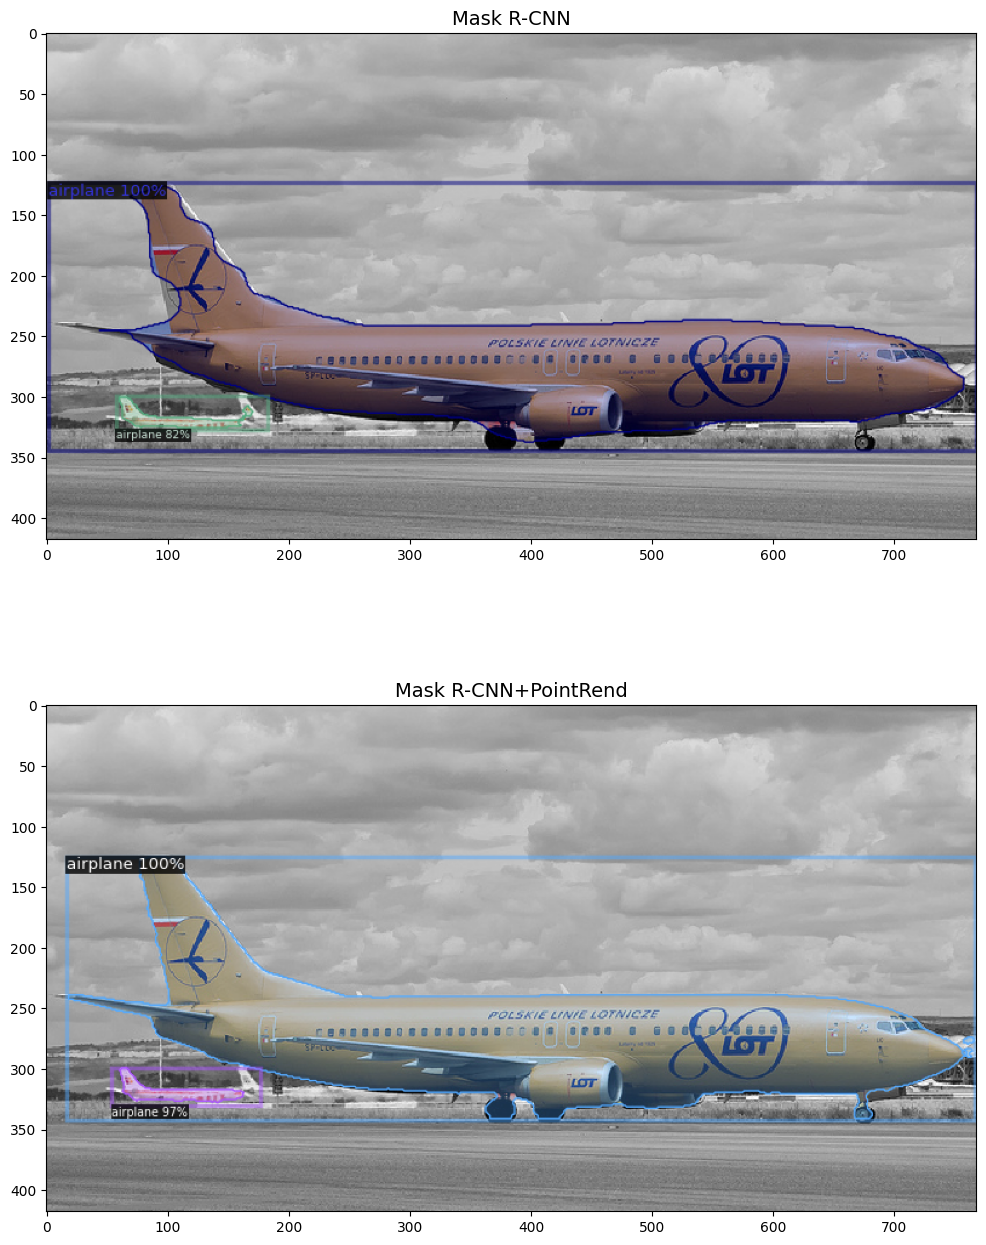

In [12]:
import matplotlib.pyplot as plt

# Show and compare two predictions using plt.imshow and Visualizer
fig, axes = plt.subplots(2, 1, figsize=(12, 16))

v_mask_rcnn = Visualizer(im[:, :, ::-1], coco_metadata, scale=1.2, instance_mode=ColorMode.IMAGE_BW)
mask_rcnn_result = v_mask_rcnn.draw_instance_predictions(mask_rcnn_outputs["instances"].to("cpu")).get_image()
axes[0].imshow(mask_rcnn_result)
axes[0].set_title("Mask R-CNN", fontsize=14)

v_point_rend = Visualizer(im[:, :, ::-1], coco_metadata, scale=1.2, instance_mode=ColorMode.IMAGE_BW)
point_rend_result = v_point_rend.draw_instance_predictions(outputs["instances"].to("cpu")).get_image()
axes[1].imshow(point_rend_result)
axes[1].set_title("Mask R-CNN+PointRend", fontsize=14)

plt.show()


In [15]:
# Download COCO dataset for evaluation and extract
import os
# Create directories if they don't exist
os.makedirs("./datasets/coco/val2017", exist_ok=True)  # Directory to store validation images
os.makedirs("./datasets/coco/annotations", exist_ok=True)  # Directory to store annotations
# Download the COCO validation images zip file and annotations zip file
!wget http://images.cocodataset.org/zips/val2017.zip -P ./datasets/coco/
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip -P ./datasets/coco/
# Extract the validation images and annotations
!unzip -q ./datasets/coco/val2017.zip -d ./datasets/coco/
!unzip -q ./datasets/coco/annotations_trainval2017.zip -d ./datasets/coco/annotations
# Move annotations from the inner directory to the parent directory
!mv ./datasets/coco/annotations/annotations/* ./datasets/coco/annotations/
# Remove the unnecessary inner directory created during extraction
!rm -r ./datasets/coco/annotations/annotations
# Confirm that the directory structure is correct by listing the contents of the annotations directory
!ls ./datasets/coco/annotations/

--2024-05-13 17:42:41--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.249.132, 52.217.202.129, 16.182.103.81, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.249.132|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: './datasets/coco/val2017.zip'

val2017.zip         100%[===================>] 777.80M  96.3MB/s    in 8.1s    

2024-05-13 17:42:49 (95.6 MB/s) - './datasets/coco/val2017.zip' saved [815585330/815585330]

--2024-05-13 17:42:50--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.43.137, 16.182.74.201, 52.217.112.81, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.43.137|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: './datasets/co

In [16]:
# Evaluate the results using COCO evaluation metrics
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

# cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # load the model
evaluator = COCOEvaluator("coco_2017_val", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "coco_2017_val")
inference_on_dataset(mask_rcnn_predictor.model, val_loader, evaluator)

WARNING [05/13 17:45:40 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[05/13 17:45:42 d2.data.datasets.coco]: Loaded 5000 images in COCO format from datasets/coco/annotations/instances_val2017.json
[05/13 17:45:43 d2.data.build]: Distribution of instances among all 80 categories:
|   category    | #instances   |   category   | #instances   |   category    | #instances   |
|:-------------:|:-------------|:------------:|:-------------|:-------------:|:-------------|
|    person     | 10777        |   bicycle    | 314          |      car      | 1918         |
|  motorcycle   | 367          |   airplane   | 143          |      bus      | 283          |
|     train     | 190          |    truck     | 414          |     boat      | 424          |
| traffic light | 634          | fire hydrant | 101          |   stop sign   | 75           |
| parking meter | 60           |    bench     | 411    

OrderedDict([('bbox',
              {'AP': 37.45926068086821,
               'AP50': 54.560572628484415,
               'AP75': 41.85450652308338,
               'APs': 19.95555739142566,
               'APm': 40.36534841553329,
               'APl': 50.87054835904088,
               'AP-person': 52.12074789584046,
               'AP-bicycle': 27.318954792810445,
               'AP-car': 41.708985977367355,
               'AP-motorcycle': 38.85764489805458,
               'AP-airplane': 60.326406532074074,
               'AP-bus': 60.841291178176085,
               'AP-train': 58.35237588409343,
               'AP-truck': 28.61972685536225,
               'AP-boat': 23.537713968029685,
               'AP-traffic light': 24.73908085209478,
               'AP-fire hydrant': 63.26708158273766,
               'AP-stop sign': 62.213534000930196,
               'AP-parking meter': 41.900914566992675,
               'AP-bench': 21.51834359018652,
               'AP-bird': 32.35305428402542,
 

In [17]:
# Evaluate the results using COCO evaluation metrics
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

# cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # load the model
evaluator = COCOEvaluator("coco_2017_val", cfg, False, output_dir="./output1/")
val_loader = build_detection_test_loader(cfg, "coco_2017_val")
inference_on_dataset(predictor.model, val_loader, evaluator)

WARNING [05/13 17:56:26 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[05/13 17:56:28 d2.data.datasets.coco]: Loaded 5000 images in COCO format from datasets/coco/annotations/instances_val2017.json
[05/13 17:56:28 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[05/13 17:56:28 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[05/13 17:56:28 d2.data.common]: Serializing 5000 elements to byte tensors and concatenating them all ...
[05/13 17:56:28 d2.data.common]: Serialized dataset takes 19.10 MiB
[05/13 17:56:29 d2.evaluation.evaluator]: Start inference on 5000 batches
[05/13 17:56:30 d2.evaluation.evaluator]: Inference done 11/5000. Dataloading: 0.0013 s/iter. Inference: 0.0744 s/iter. Eval: 0.0057 s/iter. Total: 0.0813 s/

OrderedDict([('bbox',
              {'AP': 37.31837061167531,
               'AP50': 54.53419056072193,
               'AP75': 41.4706273564017,
               'APs': 19.978913223797395,
               'APm': 40.2548128344011,
               'APl': 49.89302827004651,
               'AP-person': 52.0762192405542,
               'AP-bicycle': 27.47219483166466,
               'AP-car': 41.36679310008097,
               'AP-motorcycle': 39.07821581082868,
               'AP-airplane': 61.53440709690725,
               'AP-bus': 59.84245366219124,
               'AP-train': 58.23880441728806,
               'AP-truck': 28.974394745467546,
               'AP-boat': 24.213473007359575,
               'AP-traffic light': 24.53822255849875,
               'AP-fire hydrant': 62.72381278212143,
               'AP-stop sign': 64.9151575297622,
               'AP-parking meter': 40.5069539921025,
               'AP-bench': 21.72005509937495,
               'AP-bird': 33.376809469433894,
          

In [20]:
print("end")

end
